# The SV's
hw 4

## Imports

In [36]:
# basic
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# data manipulation
from sklearn import metrics
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# preset data
from sklearn.datasets import load_breast_cancer

## Setup

In [37]:
dataset = load_breast_cancer()

In [38]:
cancer_data = dataset.data
cancer_data.shape

(569, 30)

In [39]:
cancer_labels = dataset.target
cancer_labels = np.reshape(cancer_labels,(len(cancer_labels),1))
cancer_labels.shape

(569, 1)

In [40]:
cancer_data = np.concatenate([cancer_data,cancer_labels],axis=1)
cancer_data.shape

(569, 31)

In [41]:
cancer_df = pd.DataFrame(cancer_data)
cancer_df.columns = np.append(dataset.feature_names, 'target')
print(f'Shape: {cancer_df.shape}')
cancer_df.tail()

Shape: (569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


In [42]:
def remap_labels(data_series):
    data_series.replace(0, 'Benign',inplace=True)
    data_series.replace(1, 'Malignant',inplace=True)

In [43]:
remap_labels(cancer_df['target'])
cancer_df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


In [44]:
print(cancer_df.shape)
features = cancer_df.columns.values
class_names=['Benign' , 'Malignant'] # name of classes

(569, 31)


## Confusion function

In [45]:
def print_conf_matrix(confusion_matrix, conf_title, class_labels):
    fig, ax = plt.subplots()
    # create heatmap
    sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels=class_labels, yticklabels=class_labels)
    ax.xaxis.set_label_position("top")
    ax.xaxis.set_ticks_position("top")
    plt.tight_layout()
    plt.title(conf_title, y=1.15);
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');

# Part 1
SVM

## Setup

In [46]:
q_num = "Q1: SV_"

In [47]:
x_df = cancer_df.copy()
y_df = x_df.pop('target')

x = x_df.values
y = y_df.values

In [48]:
print(f"x shape: {x.shape}")
print(f"y shape: {y.shape}")

print(f"{features.shape} with values of", features)

x shape: (569, 30)
y shape: (569,)
(31,) with values of ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'
 'target']


In [49]:
scaler = MinMaxScaler()
# scaler = StandardScaler()

x = scaler.fit_transform(x)

## Split and Train function

In [50]:
def train_from_decomp (x_decomp, y_decomp, pca_title):
    # print("train_shape:" , x_decomp.shape) # Debug line
    
    # --- SPLIT DATA
    x_train, x_test, y_train, y_test = model_selection.train_test_split(x_decomp, y_decomp, test_size = 0.2, random_state=22)
    # print("x training size: ", x_train.shape)   # Debug line
    # print("y training size: ", y_train.shape)   # Debug line
    # print("x test size: ", x_test.shape)   # Debug line
    # print("y test size: ", y_test.shape)   # Debug line

    # --- TRAIN MODEL
    classifier = GaussianNB()
    classifier.fit(x_train, y_train)

    # --- REPORT DATA
    y_pred = classifier.predict(x_test)
    
    return y_test , y_pred

## Decomposition

In [51]:
class_names=['Benign' , 'Malignant'] # name of classes
confusion_list = list()
report_list = list()


for num_components in range(1, (x.shape)[1] + 1):
    pca_title = str(num_components) + f" Component PCA ({q_num})";
    column_components = ['Component ' + str(item)   for item in range(1 , num_components + 1)]
    print(pca_title + '\n')
    
    # --- DECOMPOSE
    pca = PCA(n_components=num_components)
    principalComponents = pca.fit_transform(x.copy())
    principal_df = pd.DataFrame(data = principalComponents, 
                            columns = column_components
                )
    print('PCA shape:' , principalComponents.shape)
    
    
    # --- DATA FRAME
    decomp_df = pd.concat([principal_df, y_df.copy()], axis = 1)
    # print(decomp_df) 
    print('\n')
    
    
    # --- CONVERT DATA FROM DATA FRAME 
    x_decomp = decomp_df
    y_decomp = x_decomp.pop('target')
    x_decomp = x_decomp.values
    y_decomp = y_decomp.values
    # print(x_decomp.shape)
    # print(y_decomp.shape)
    
    y_test , y_pred = train_from_decomp(x_decomp, y_decomp, pca_title)
    
    
    print(metrics.classification_report(y_test, y_pred, digits=4, output_dict=False))
    
    report_list.append(metrics.classification_report(y_test, y_pred, digits=4, output_dict=True))
    confusion_list.append(metrics.confusion_matrix(y_test, y_pred))
    
   
    print('\n' + '-'*75  +  '\n')

1 Component PCA (Q1: SV_)

PCA shape: (569, 1)


              precision    recall  f1-score   support

      Benign     0.9756    0.9302    0.9524        43
   Malignant     0.9589    0.9859    0.9722        71

    accuracy                         0.9649       114
   macro avg     0.9673    0.9581    0.9623       114
weighted avg     0.9652    0.9649    0.9647       114


---------------------------------------------------------------------------

2 Component PCA (Q1: SV_)

PCA shape: (569, 2)


              precision    recall  f1-score   support

      Benign     0.9756    0.9302    0.9524        43
   Malignant     0.9589    0.9859    0.9722        71

    accuracy                         0.9649       114
   macro avg     0.9673    0.9581    0.9623       114
weighted avg     0.9652    0.9649    0.9647       114


---------------------------------------------------------------------------

3 Component PCA (Q1: SV_)

PCA shape: (569, 3)


              precision    recall  f1-score

In [52]:
accuracy_list = list()
precision_list = list()
recall_list = list()

for report in report_list:
    accuracy_list.append(  report["accuracy"]                    )
    precision_list.append((report["weighted avg"])['precision']  )
    recall_list.append(   (report["weighted avg"])['recall']     )

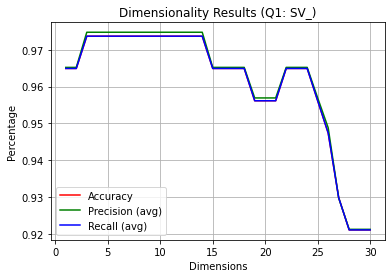

In [53]:
# print report_list stats
plt.figure(1)
plt.plot(range(1, len(accuracy_list)+1) , accuracy_list , color='r')
plt.plot(range(1, len(precision_list)+1) , precision_list , color='g')
plt.plot(range(1, len(recall_list)+1) , recall_list , color='b')
plt.grid() 
plt.xlabel('Dimensions') 
plt.ylabel('Percentage') 
plt.legend(["Accuracy", "Precision (avg)", "Recall (avg)"])
plt.title(f"Dimensionality Results ({q_num})") ;

## Output

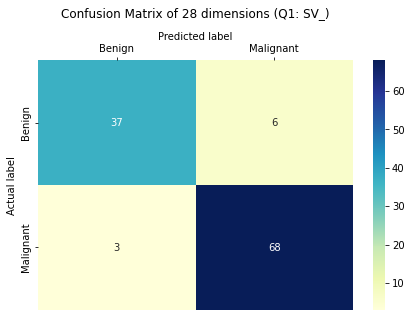

In [54]:
inspect_dimension = 28

print_conf_matrix(confusion_list[inspect_dimension - 1], f"Confusion Matrix of {inspect_dimension} dimensions ({q_num})", class_names)

# Part 2
SVR

## Setup

## Operation